# FINAL PROJECT: Heart Failure Prediction

KELOMPOK 4 :
- Jonathan Adiwinata
- Melin Febriani

## Introduction

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia. Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 variabel yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas. Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan penanganan dini di mana model machine learning dapat sangat membantu. Model Machine Learning yang akan digunakan pada kasus kali ini adalah Ensemble Learning dengan teknik Bagging yaitu model Random Forest dan teknik boosting dengan model Gradient Boosting

## Import Libraries

Install dan import libraries yang digunakan.

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl
import plotly.graph_objects as go

%matplotlib inline

from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV ,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, precision_score, balanced_accuracy_score
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [136]:
mpl.style.use(['ggplot'])

## Data Loading

In [137]:
# data = pd.read_csv('C:/Kuliah/Studi Independen/heart_failure.csv')
data = pd.read_csv('E:/Cool Yeah/Hacktiv8/Final-Project_Kelompok4/Data/heart_failure.csv')

Memanggil bagian kepala data.

In [138]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Memanggil bagian ekor data.

In [139]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Mengecek dimensi data.

In [140]:
data.shape

(299, 13)

Dari hasil diatas terdapat 145.460 baris data dan 23 kolom data

Mengecek info dataset.

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Mengecek tipe data apa saja yg ada pada variabel.

In [142]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Terdapat 3 variabel bertipe float dan 10 variabel bertipe integer

Statistik Deskriptif.

In [143]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Mengecek atribut data.

In [144]:
data.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [145]:
data.creatinine_phosphokinase.value_counts()

582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64

In [146]:
data.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [147]:
data.ejection_fraction.value_counts()

35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
65     1
14     1
80     1
70     1
Name: ejection_fraction, dtype: int64

In [148]:
data.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [149]:
data.platelets.value_counts()

263358.03    25
221000.00     4
279000.00     4
271000.00     4
305000.00     4
             ..
227000.00     1
289000.00     1
300000.00     1
217000.00     1
742000.00     1
Name: platelets, Length: 176, dtype: int64

In [150]:
data.serum_creatinine.value_counts()

1.00    50
1.10    32
0.90    32
1.20    24
0.80    24
1.30    20
0.70    19
1.18    11
1.40     9
1.70     9
1.83     8
1.60     6
1.90     5
2.10     5
1.50     5
0.60     4
1.80     4
2.30     3
2.70     3
2.50     3
3.50     2
2.40     2
3.00     2
0.50     1
5.00     1
0.75     1
6.10     1
3.40     1
3.70     1
9.00     1
4.00     1
3.20     1
5.80     1
2.90     1
2.00     1
2.20     1
6.80     1
9.40     1
4.40     1
3.80     1
Name: serum_creatinine, dtype: int64

In [151]:
data.serum_sodium.value_counts()

136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
127     3
143     3
128     2
129     2
121     1
116     1
146     1
126     1
124     1
113     1
125     1
148     1
Name: serum_sodium, dtype: int64

In [152]:
data.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [153]:
data.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [154]:
data.time.value_counts()

250    7
187    7
10     6
186    6
107    6
      ..
97     1
96     1
86     1
77     1
285    1
Name: time, Length: 148, dtype: int64

In [155]:
data.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [156]:
data['DEATH_EVENT'].value_counts()/len(data)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

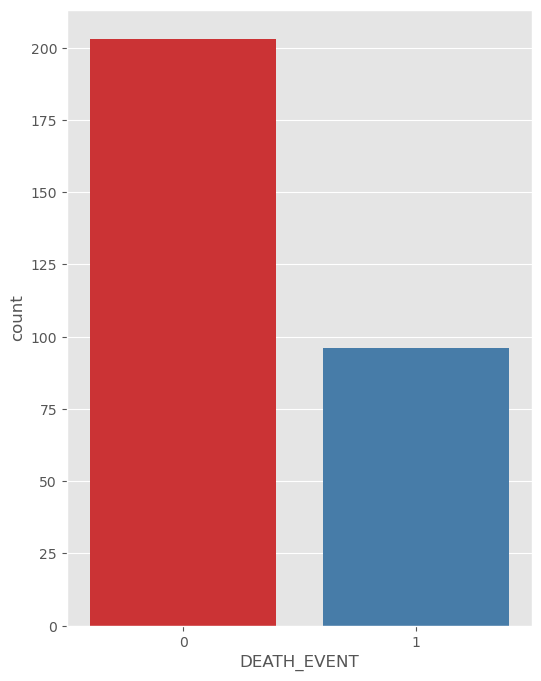

In [157]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="DEATH_EVENT", data=data, palette="Set1")
plt.show()

Kolom DEATH_EVENT yang merupakan Target memiliki value 0 dengan jumlah 203 dan value 1 dengan jumlah 96. Ini menunjukan bahwa ada ketidakseimbangan pada data atau imbalance.

## Data Cleaning

Mengecek jumlah data yang memiliki duplicate.

In [158]:
data.duplicated().sum()

0

Mengecek apakah masih terdapat data duplicated pada data dan hasilnya tidak ada.

In [159]:
data.duplicated().value_counts()

False    299
dtype: int64

### Mengisi Missing Value

In [160]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Data Exploration

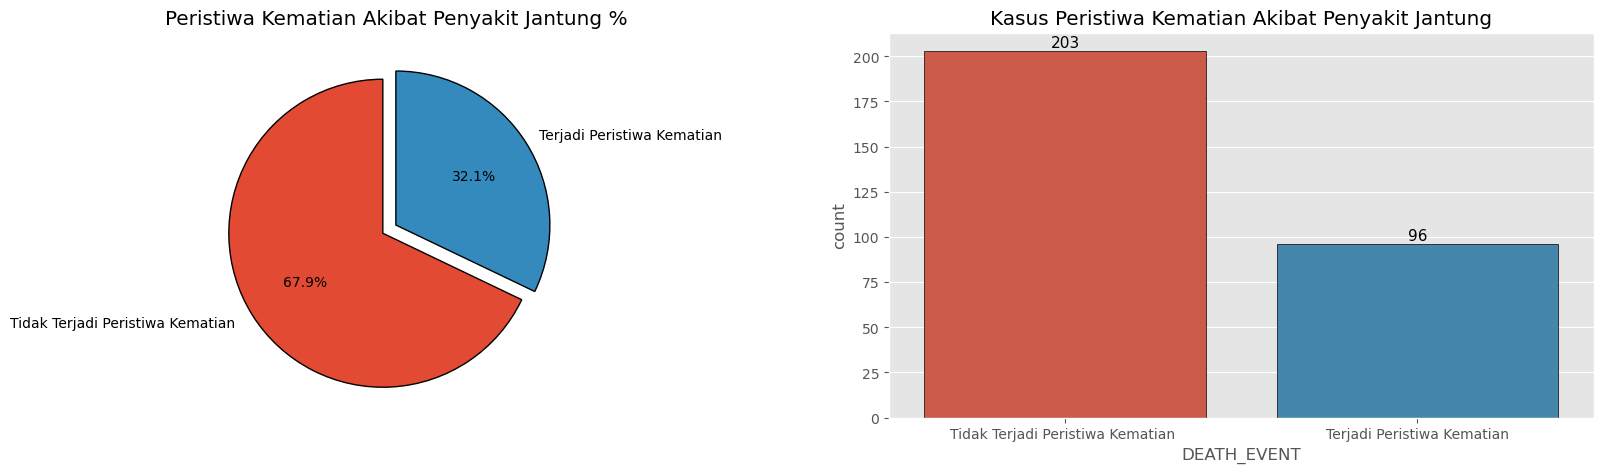

In [161]:
l = list(data['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['Tidak Terjadi Peristiwa Kematian ','Terjadi Peristiwa Kematian'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Peristiwa Kematian Akibat Penyakit Jantung %');

plt.subplot(1,2,2)
ax = sns.countplot('DEATH_EVENT',data = data, edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Tidak Terjadi Peristiwa Kematian ','Terjadi Peristiwa Kematian'])
plt.title('Kasus Peristiwa Kematian Akibat Penyakit Jantung');
plt.show()

Dari subplot diatas menunjukkan bahwa berdasarkan Kasus Peristiwa Kematian Akibat Penyakit Jantung, dari 299 kasus penyakit jantung sebanyak 67.9% atau 203 kasus tidak terjadi peristiwa kematian dan sebanyak 32,1% atau 96 kasus terjadi peristiwa kematian

Membuat fungsi untuk visualisasi data.

In [162]:
def donut(col, label1, label2, title_text1, title_text2):
    d1 = data[(data["DEATH_EVENT"]==0) & (data[col]==0)]
    d2 = data[(data["DEATH_EVENT"]==1) & (data[col]==0)]
    d3 = data[(data["DEATH_EVENT"]==0) & (data[col]==1)]
    d4 = data[(data["DEATH_EVENT"]==1) & (data[col]==1)]

    values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
    values2 = [len(d1),len(d2),len(d3),len(d4)]

    # Create subplots: use 'domain' type for Pie subplot
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels=label1, values=values1),
                1, 1)
    fig.add_trace(go.Pie(labels=label2, values=values2),
                1, 2)

    # Use `hole` to create a donut-like pie chart
    fig.update_traces(hole=.5, hoverinfo="label+percent")

    fig.update_layout(
        title_text='%s \
            %s' % (title_text1, title_text2),
            autosize=False,width=950, height=500, paper_bgcolor="white"
        )

    fig.show()

In [163]:
# membuat label
label_sex1 = ["Wanita","Pria"]
label_sex2 = ['Wanita - Hidup','Wanita - Meninggal', "Pria -  Hidup", "Pria - Meninggal"]
# memanggil fungsi donut
donut('sex', label_sex1, label_sex2, "DISTRIBUSI GENDER DALAM DATASET", "GENDER DAN PERISTIWA KEMATIAN")

Dari subplot di atas dapat disimpulkan bahwa pada data diatas, sebanyak 64,9% orang adalah PRIA atau LAKI-LAKI (di mana 44,1% orang masih hidup dan 20,7% orang yang meninggal) dan sebanyak 35,1% orang adalah WANITA atau PEREMPUAN (dengan 23,7% orang yang tetap hidup dan 11,4% orang yang meninggal).

In [164]:
# membuat label
label_diabetes1 = ["Tidak Diabetes","Diabetes"]
label_diabetes2 = ['Tidak Diabetes - Hidup','Tidak Diabetes - Meninggal', "Diabetes -  Hidup", "Diabetes  - Meninggal"]
# memanggil fungsi donut
donut('diabetes', label_diabetes1, label_diabetes2, "DISTRIBUSI DIABETES DALAM DATASET", "DIABETES DAN PERISTIWA KEMATIAN")

Dari subplot di atas dapat disimpulkan bahwa pada data diatas, sebanyak 58,2% adalah orang yang BUKAN PENDERITA DIABETES (di antaranya 39,5% orang yang tetap hidup dan 18,7% orang meninggal) dan sebanyak 42,1% adalah orang PENDERITA DIABETES (dimana 28,4% orang masih tetap hidup dan 13,4% orang yang meninggal).

In [165]:
# membuat label
label_anaemia1 = ["Tidak Anemia","Anemia"]
label_anaemia2 = ['Tidak Anemia - Hidup','Tidak Anemia - Meninggal', "Anemia -  Hidup", "Anemia  - Meninggal"]
# memanggil fungsi donut
donut('anaemia', label_anaemia1, label_anaemia2, "DISTRIBUSI ANEMIA DALAM DATASET", "ANEMIA DAN PERISTIWA KEMATIAN")

Dari subplot di atas, dapat disimpulkan bahwa pada data, sebanyak 56,9% adalah orang yang BUKAN PENDERITA ANEMIA (di antaranya 40,1% orang masih hidup dan 16,7% orang meninggal) dan sebanyka 43,1% adalah PENDERITA ANEMIA (dimana 27,8% orang masih tetap hidup dan 15,4% orang meninggal).

In [166]:
# membuat label
label_hipertensi1 = ["Tidak Hipertensi","Hipertensi"]
label_hipertensi2 = ['Tidak Hipertensi - Hidup','Tidak Hipertensi - Meninggal', "Hipertensi -  Hidup", "Hipertensi  - Meninggal"]
# memanggil fungsi donut
donut('high_blood_pressure', label_hipertensi1, label_hipertensi2, "DISTRIBUSI HIPERTENSI DALAM DATASET", "HIPERTENSI DAN PERISTIWA KEMATIAN")

Dari subplot di atas dapat disimpulkan bahwa dalam data diatas, sebanyak 64.9% adalah orang yang TIDAK HIPERTENSI atau tidak memiliki tekanan darah tinggi (di antaranya 45,8% orang masih tetap hidup dan 19,1% orang yang meninggal) dan sebanyak 35.1% orang memiliki HIPERTENSI (di antaranya 22,1% orang masih tetap hidup dan 13% orang yang meninggal).

In [167]:
# membuat label
label_smoking1 = ["Tidak Merokok","Merokok"]
label_smoking2 = ['Tidak Merokok - Hidup','Tidak Merokok - Meninggal', "Merokok -  Hidup", "Merokok  - Meninggal"]
# memanggil fungsi donut
donut('smoking', label_smoking1, label_smoking2, "DISTRIBUSI MEROKOK DALAM DATASET", "MEROKOK DAN PERISTIWA KEMATIAN")

Dari subplot di atas kita dapat disimpulkan bahwa dalam data, sebanyak 67,9% orang TIDAK MEROKOK (di mana 45,8% orang masih tetap hidup dan 22,1% orang yang meninggal) dan sebanyak 32,1% orang yang MEROKOK (dimana 22,1% orang masih tetap hidup dan hanya 10% orang yang meninggal).

## Mengecek Outlier

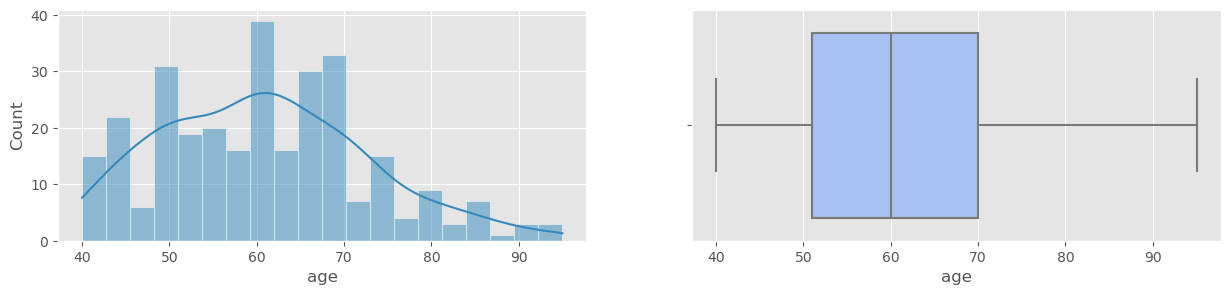

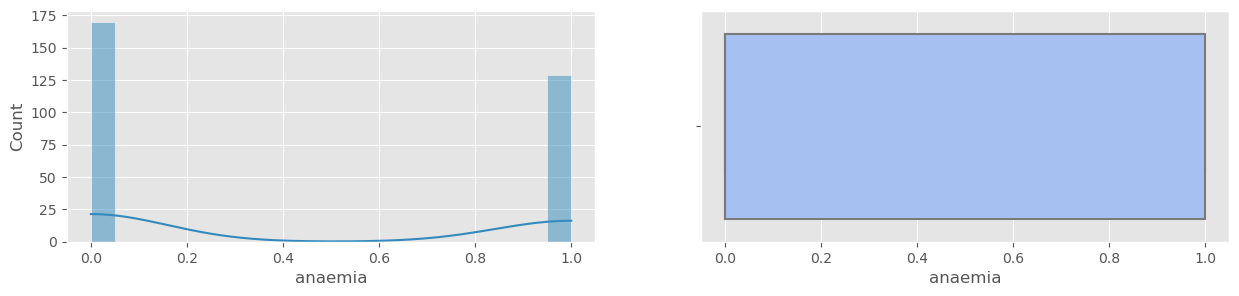

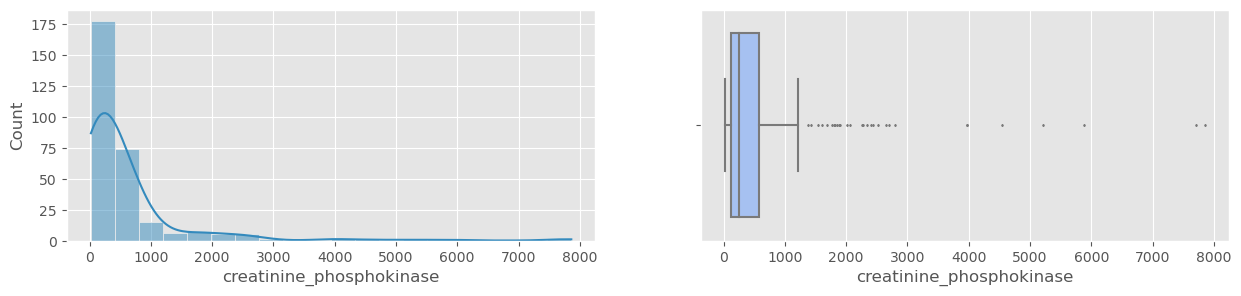

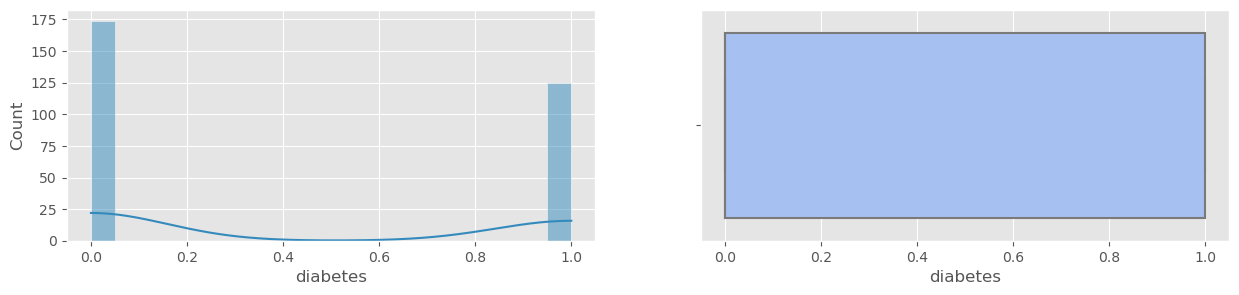

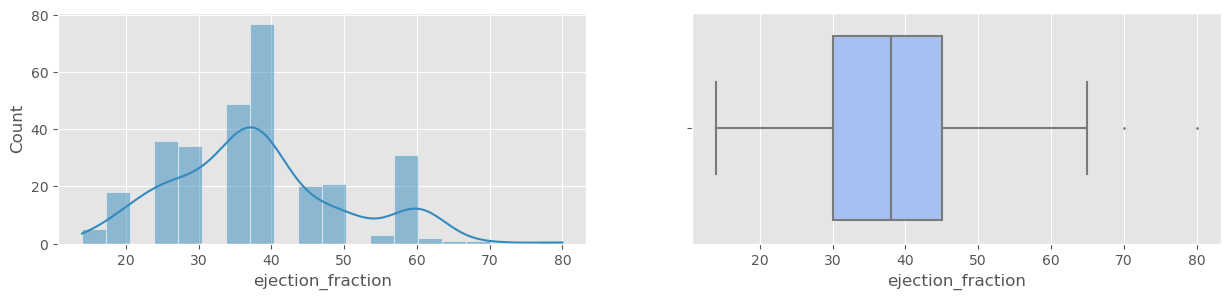

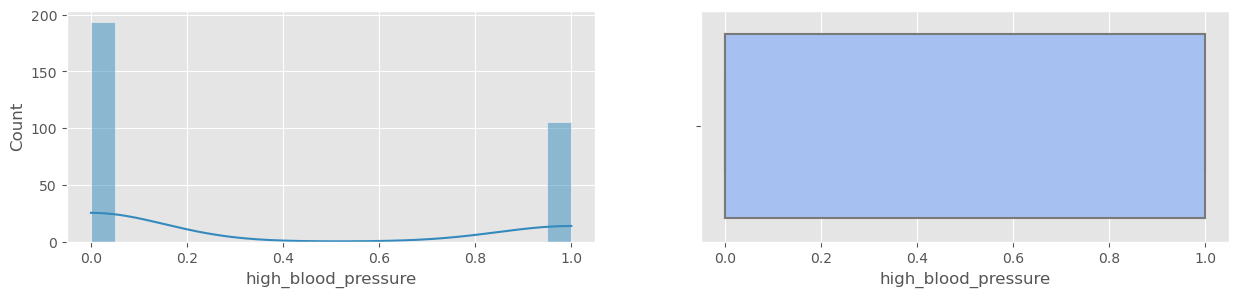

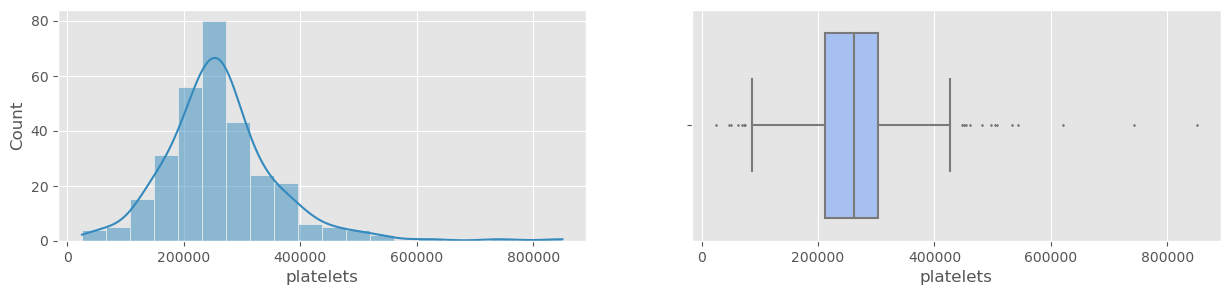

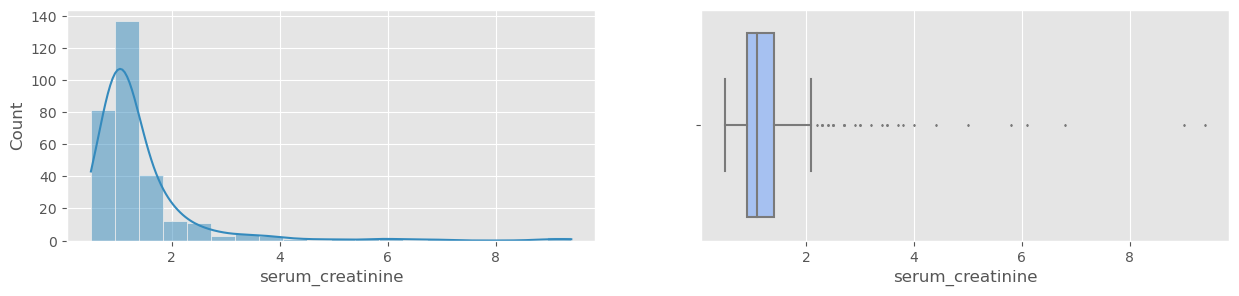

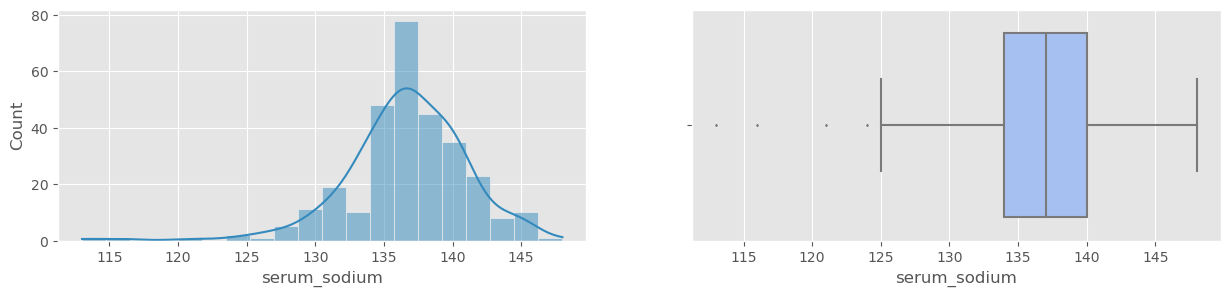

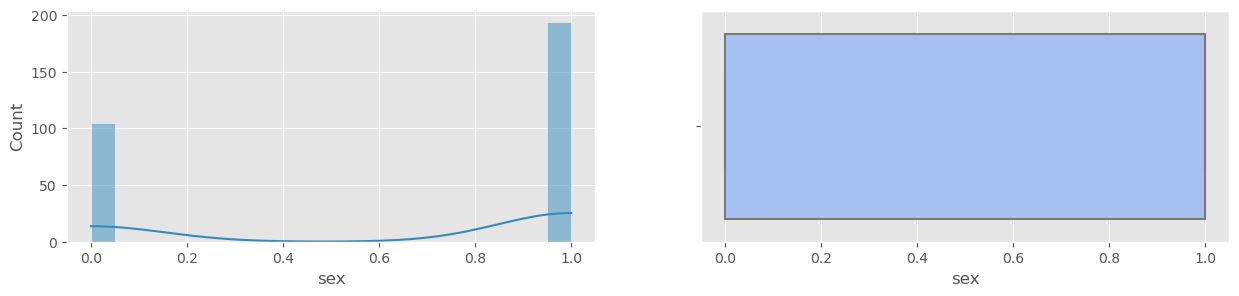

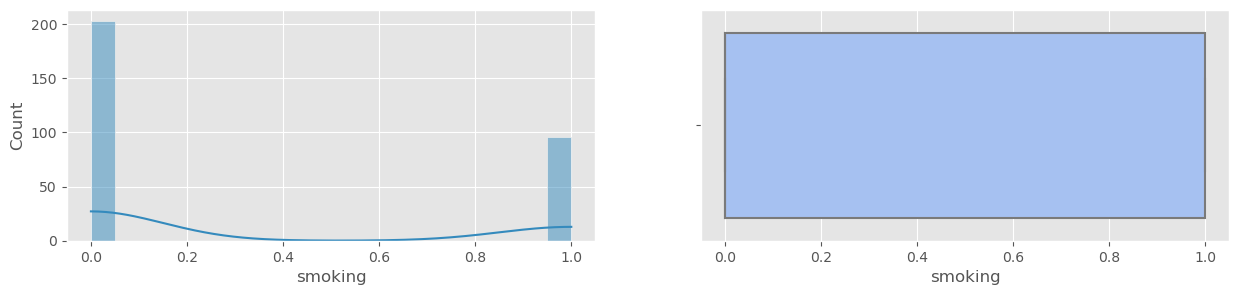

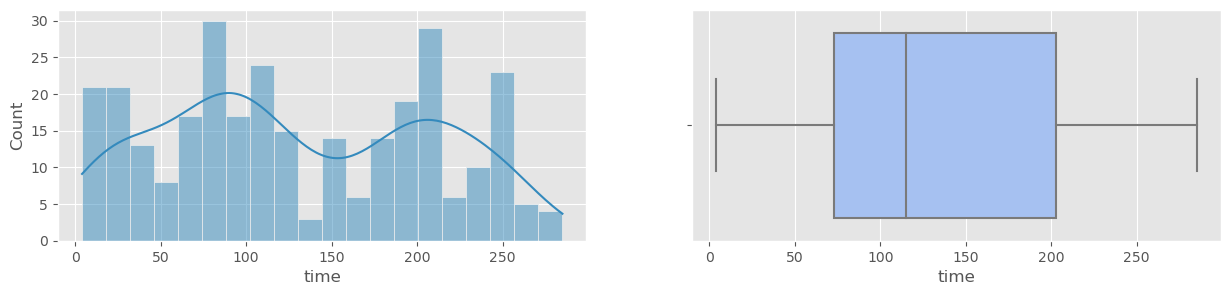

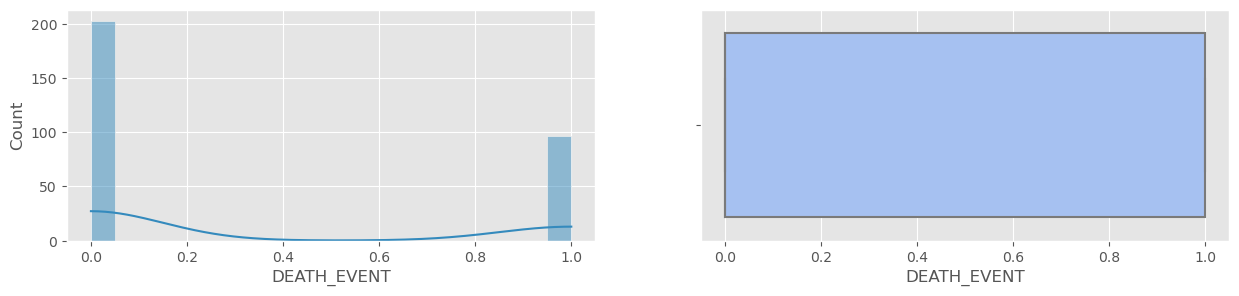

In [168]:
col = list(data.columns)
for i in col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

## Menampilkan Heatmap.

In [169]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [170]:
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

<AxesSubplot:>

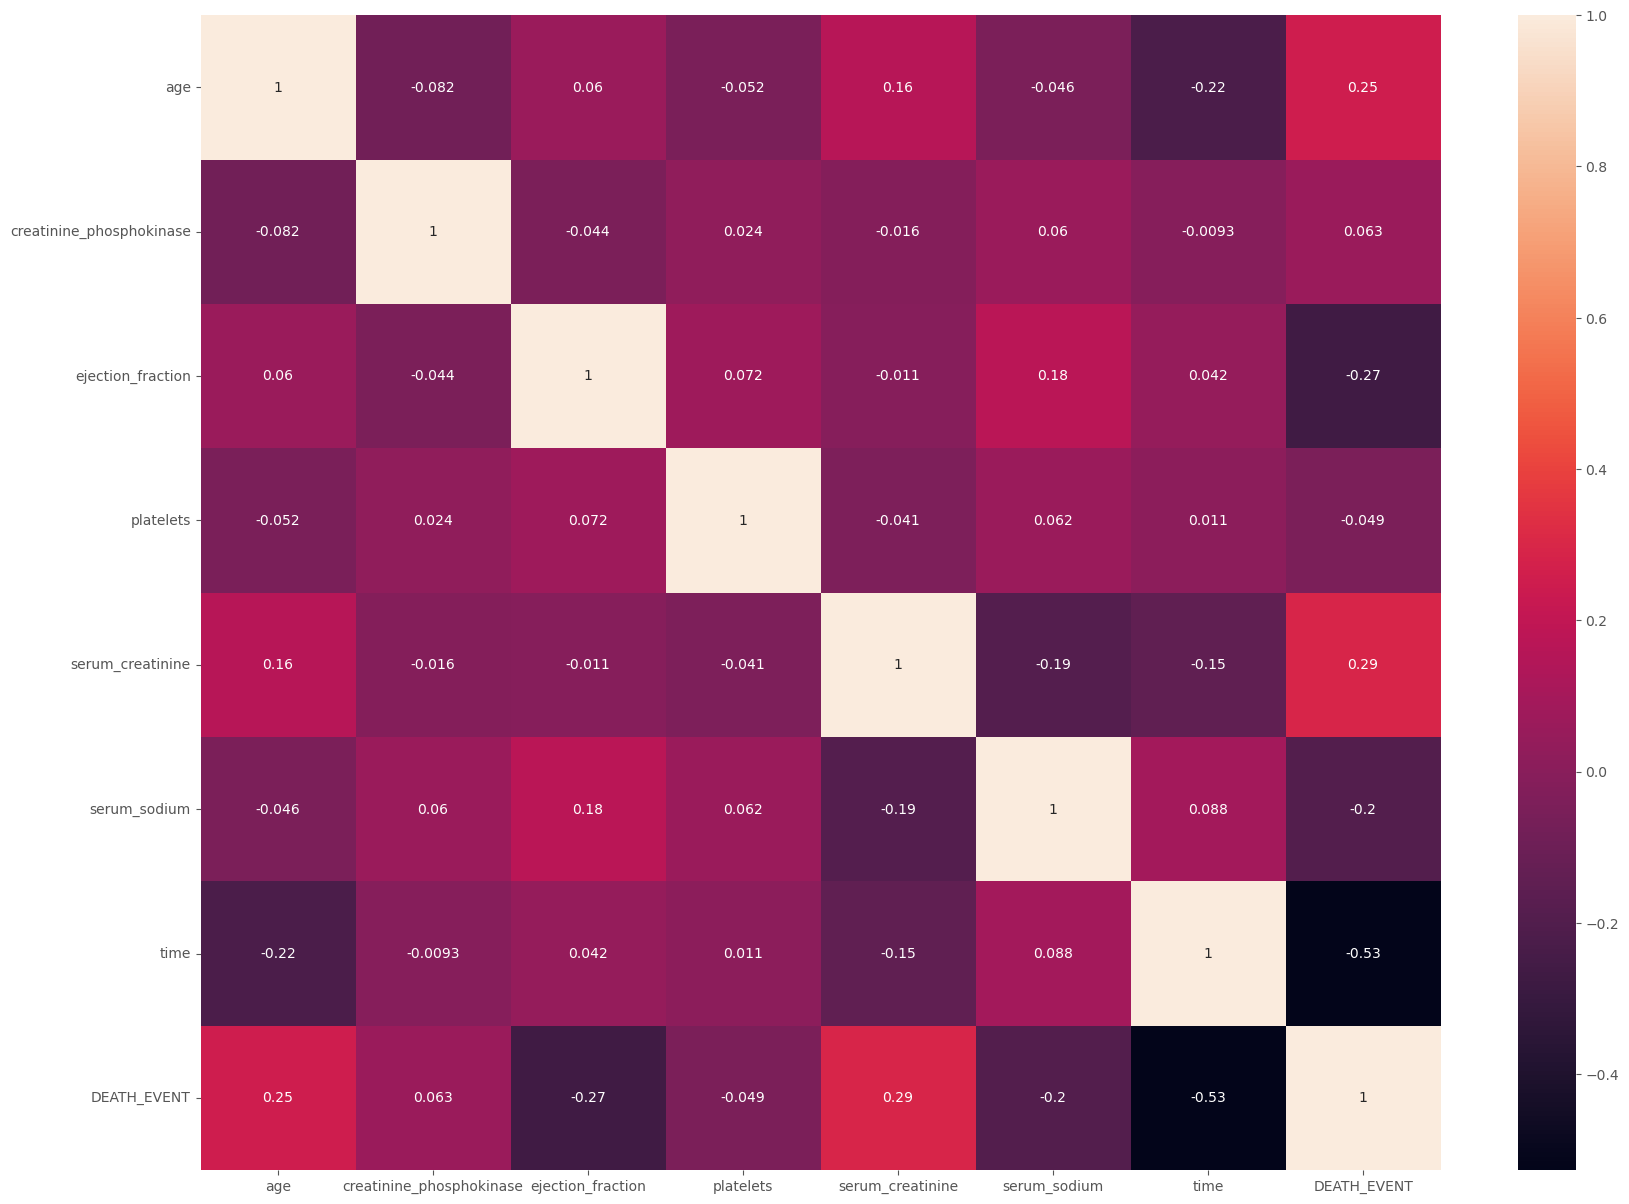

In [171]:
plt.figure(figsize=(20,15))
sns.heatmap(data.drop(categorical_columns, axis=1).corr(),annot=True)

Variabel yang memiliki korelasi yang kuat dengan DEATH_EVENT adalah :
1. age dan DEATH_EVENT berkorelasi positif (koefisien korelasi = 0.25)
2. serum_creatinine dan DEATH_EVENT berkorelasi positif (koefisien korelasi= 0.29)
3. time dan DEATH_EVENT berkorelasi negatif (koefisien korelasi = -0.53)

## Correlation Tests

Membuat fungsi untuk uji chi-squared.

In [174]:
def chi_squared(col, title):
    # mengubah data menjadi tabel kontingensi dengan frekuensi
    contingency= pd.crosstab(data[col], data['DEATH_EVENT'])
    # menampilkan heatmap
    plt.figure(figsize=(8,8))
    sns.heatmap(contingency, annot=True, fmt='d', cmap="YlGnBu")
    plt.title(title)
    # chi-square test
    c, p, dof, expected = chi2_contingency(contingency) 
    print('p = ',p)
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

p =  0.3073160508415107
Probably independent


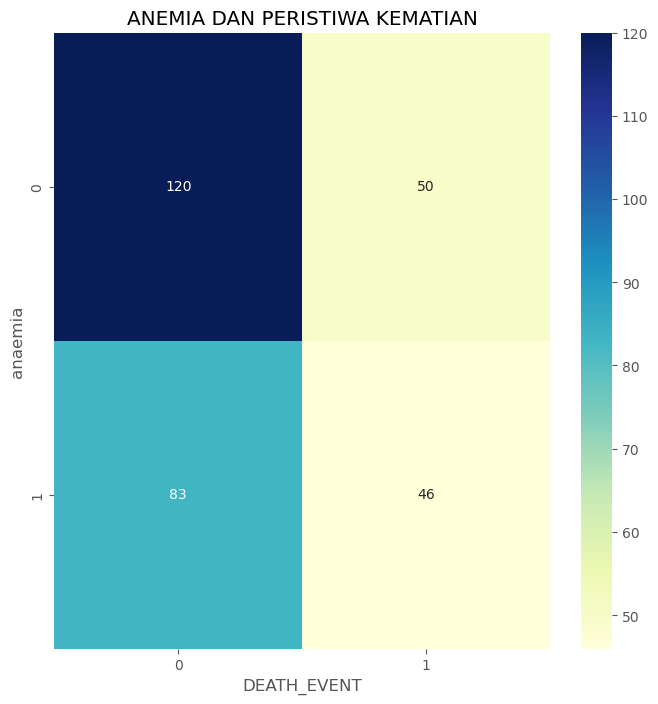

In [175]:
chi_squared('anaemia', 'ANEMIA DAN PERISTIWA KEMATIAN')

Hasil uji chi-squared menunjukkan bahwa nilai p-value (30.73%) lebih besar dari 5% yang berarti kita gagal tolak h0, terima h1, yaitu anaemia dan DEATH_EVENT adalah independen.

p =  1.0
Probably independent


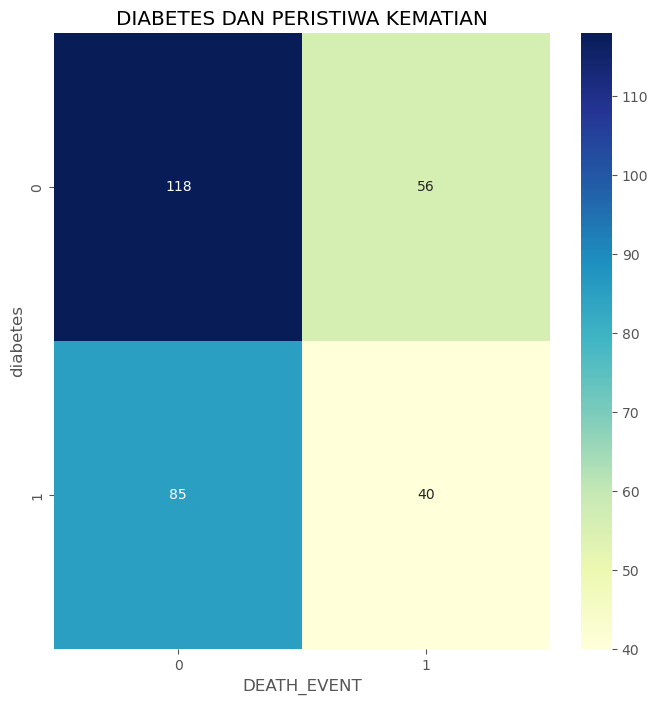

In [176]:
chi_squared('diabetes', 'DIABETES DAN PERISTIWA KEMATIAN')

Hasil uji chi-squared menunjukkan bahwa nilai p-value (100%) lebih besar dari 5% yang berarti kita gagal tolak h0, terima h1, yaitu diabetes dan DEATH_EVENT adalah independen.

p =  0.21410341199416902
Probably independent


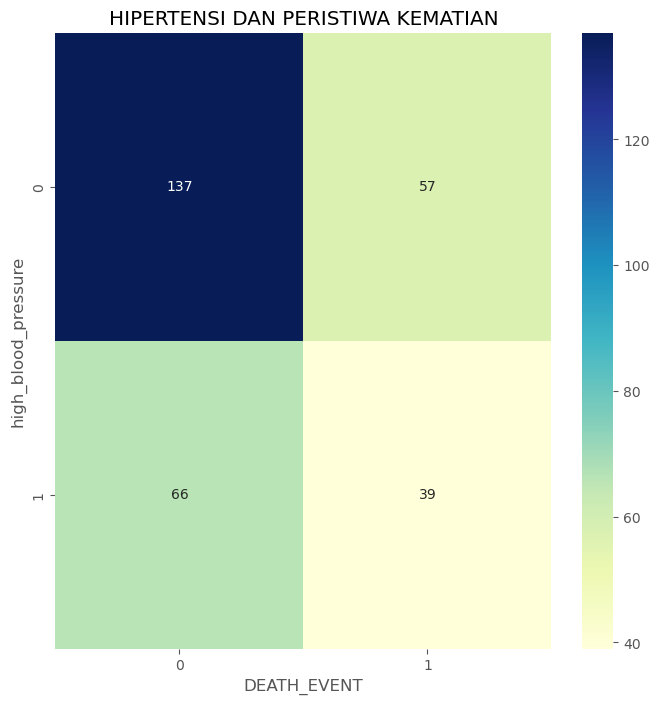

In [177]:
chi_squared('high_blood_pressure', 'HIPERTENSI DAN PERISTIWA KEMATIAN')

Hasil uji chi-squared menunjukkan bahwa nilai p-value (21.41%) lebih besar dari 5% yang berarti kita gagal tolak h0, terima h1, yaitu high_blood_pressure dan DEATH_EVENT adalah independen.

p =  1.0
Probably independent


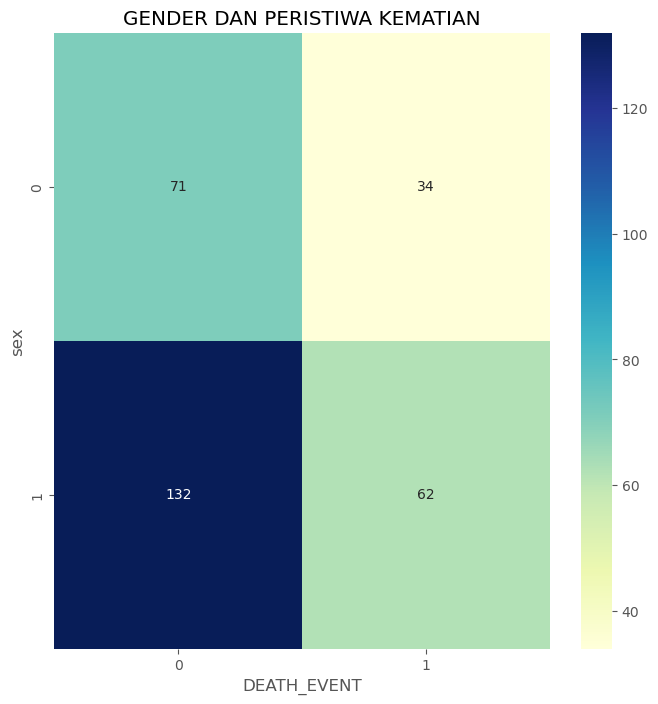

In [178]:
chi_squared('sex', 'GENDER DAN PERISTIWA KEMATIAN')

Hasil uji chi-squared menunjukkan bahwa nilai p-value (100%) lebih besar dari 5% yang berarti kita gagal tolak h0, terima h1, yaitu sex dan DEATH_EVENT adalah independen.

p =  0.9317652998235507
Probably independent


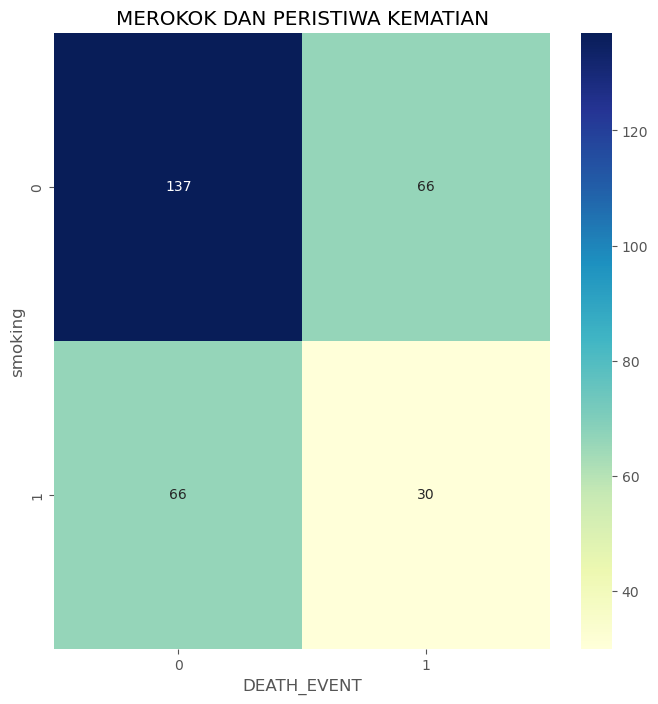

In [179]:
chi_squared('smoking', 'MEROKOK DAN PERISTIWA KEMATIAN')

Hasil uji chi-squared menunjukkan bahwa nilai p-value (93.18%) lebih besar dari 5% yang berarti kita gagal tolak h0, terima h1, yaitu smoking dan DEATH_EVENT adalah independen.

## Data Preprocessing

### Feature Scaling

In [180]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
data['age'] = mms.fit_transform(data[['age']])
data['creatinine_phosphokinase'] = mms.fit_transform(data[['creatinine_phosphokinase']])
data['ejection_fraction'] = mms.fit_transform(data[['ejection_fraction']])
data['serum_creatinine'] = mms.fit_transform(data[['serum_creatinine']])
data['time'] = mms.fit_transform(data[['time']])

# Standardization
data['platelets'] = ss.fit_transform(data[['platelets']])
data['serum_sodium'] = ss.fit_transform(data[['serum_sodium']])
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,1.681648e-02,0.157303,-1.504036,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,7.535660e-09,0.067416,-0.141976,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,-1.038073e+00,0.089888,-1.731046,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,-5.464741e-01,0.157303,0.085034,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,6.517986e-01,0.247191,-4.682176,0,0,0.014235,1


Pada Algoritme berbasis pohon, feature scaling tidak memberi pengaruh pada performa model.

### Handling Categorical Variables

Untuk Algoritma Berbasis Pohon, cara terbaik adalah dengan melakukan Label Encoding.

In [181]:
data[categorical_columns].head(10)

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0
5,1,0,1,1,1
6,1,0,0,1,0
7,1,1,0,1,1
8,0,0,0,0,0
9,1,0,1,1,1


Karena variabel kategorikal sudah numerik, kita tidak perlu melakukan Label Encoding.

### Split Data

In [198]:
x=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

Menampilkan variabel X.

In [183]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0,0.071319,0,0.090909,1,1.681648e-02,0.157303,-1.504036,1,0,0.000000
1,0.272727,0,1.000000,0,0.363636,0,7.535660e-09,0.067416,-0.141976,1,0,0.007117
2,0.454545,0,0.015693,0,0.090909,0,-1.038073e+00,0.089888,-1.731046,1,1,0.010676
3,0.181818,1,0.011227,0,0.090909,0,-5.464741e-01,0.157303,0.085034,1,0,0.010676
4,0.454545,1,0.017479,1,0.090909,0,6.517986e-01,0.247191,-4.682176,0,0,0.014235


Menampilkan variabel Y.

In [184]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [199]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

Dalam hal ini dilakukan pemisahan data dengan ukuran data testing adalah 50% dan ukuran data training adalah 50%  yang diambil secara acak dengan nomor generator 0. Nomor ini menandakan nomor pengacakan agar jika di run kembali, pengacakan data akan tetap sama. Data training (X_train, Y_train) berguna untuk membangun model yang hasilnya akan digunakan untuk memprediksi X_test, kemudian hasil prediksinya dievaluasi dengan mengacu pada Y_test

In [186]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(149, 12)
(149,)
(150, 12)
(150,)


## Model Definition

Model yang digunakan adalah Random Forest Classifier dan Gradient Boosting Classifier.<br>
<br>
Random Forest adalah algoritma machine learning yang menggabungkan keluaran dari beberapa decision tree untuk mencapai satu hasil. Sesuai namanya, Forest atau 'hutan' dibentuk dari banyak tree (pohon) yang diperoleh melalui proses bagging atau bootstrap aggregating. Algoritma Random Forest disebut sebagai salah satu algoritma machine learning terbaik, sama seperti Naïve Bayes dan Neural Network.<br>
<br>
Gradient boosting merupakan algoritma klasifikasi machine learning yang menggunakan ensamble dari decision tree untuk memprediksi nilai. Gradient boosting dimulai dengan menghasilkan pohon klasifikasi awal dan terus menyesuaikan pohon baru melalui minimalisasi fungsi kerugian. Teknik ini menjadi populer karena keampuhannya dalam menangani data yang kompleks, termasuk data yang memiliki noise atau kesalahan.

Precision dapat didefinisikan sebagai persentase hasil positif yang diprediksi dengan benar dari semua hasil positif yang diprediksi. Ini dapat diberikan sebagai rasio positif sejati (TP) dengan jumlah positif benar dan salah (TP + FP). Jadi, Precision mengidentifikasi proporsi hasil positif yang diprediksi dengan benar. Ini lebih mementingkan kelas positif daripada kelas negatif.
Secara matematis, precision dapat didefinisikan sebagai rasio TP ke (TP + FP).

## Model Training

### Random Forest

#### Create a model and fit it

In [200]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

#### Get results

In [201]:
print('train score : ', rf_model.score(x_train, y_train))

train score :  1.0


Hasil precision score model Random Forest pada data train menunjukkan nilai sebesar 1.0. Ini berarti sebesar 100% dari data train dapat diprediksi dengan tepat.

### Gradient Boosting

#### Create a model and fit it

In [189]:
gbc_model=GradientBoostingClassifier()
gbc_model.fit(x_train, y_train)

GradientBoostingClassifier()

#### Get results

In [190]:
print('train score : ', gbc_model.score(x_train, y_train))

train score :  1.0


Hasil precision score model Gradient Boosting pada data train menunjukkan nilai sebesar 1.0. Ini berarti sebesar 100% dari data train dapat diprediksi dengan tepat.

## Model Evaluation & Inference

### Random Forest

In [202]:
rf_pred = rf_model.predict(x_test)
precision = precision_score(y_test, rf_pred)
print('predicted response: ', rf_model, sep='\n')
print('Testing Precision: ',precision)
print('Mean squared error: %.2f'% mean_squared_error(y_test, rf_pred))

predicted response: 
RandomForestClassifier()
Testing Precision:  0.8181818181818182
Mean squared error: 0.14


Hasil precision score model Random Forest pada data test menunjukkan nilai sebesar 0.81. Ini berarti sebesar 81% dari data testing dapat diprediksi dengan tepat.

In [203]:
# print prediction results 
rf_pred = rf_model.predict(x_test) 
print(classification_report(y_test, rf_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       101
           1       0.82      0.73      0.77        49

    accuracy                           0.86       150
   macro avg       0.85      0.83      0.84       150
weighted avg       0.86      0.86      0.86       150



<AxesSubplot:>

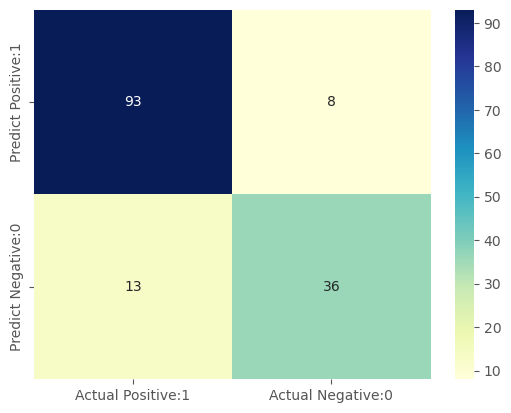

In [204]:
cm = confusion_matrix(y_test, rf_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Hasil Confusion Matrix menunjukkan 93 + 36 = 129 prediksi yang benar dan 14 + 8 = 22 prediksi yang salah.

Dalam hal ini, terdapat

1. True Positives (Actual Positive:1 and Predict Positive:1) - 93
2. True Negatives (Actual Negative:0 and Predict Negative:0) - 35
3. False Positives (Actual Negative:0 but Predict Positive:1) - 8 (Type I error)
4. False Negatives (Actual Positive:1 but Predict Negative:0) - 14 (Type II error)

### Gradient Boosting

In [171]:
gbc_pred = gbc_model.predict(x_test)
precision = precision_score(y_test, gbc_pred)
print('predicted response: ', gbc_pred, sep='\n')
print('Testing Precision: ',precision)
print('Mean squared error: %.2f'% mean_squared_error(y_test, gbc_pred))

predicted response: 
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1
 0 0]
Testing Precision:  0.7906976744186046
Mean squared error: 0.16


Hasil precision score model Gradient Boosting pada data test menunjukkan nilai sebesar 0.79. Ini berarti sebesar 79% dari data testing dapat diprediksi dengan tepat.

In [172]:
# print prediction results 
gbc_pred = gbc_model.predict(x_test) 
print(classification_report(y_test, gbc_pred)) 

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       101
           1       0.79      0.69      0.74        49

    accuracy                           0.84       150
   macro avg       0.83      0.80      0.81       150
weighted avg       0.84      0.84      0.84       150



<AxesSubplot:>

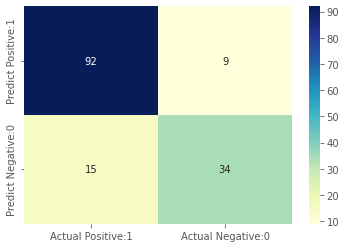

In [173]:
cm = confusion_matrix(y_test, gbc_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Hasil Confusion Matrix menunjukkan 92 + 34 = 126 prediksi yang benar dan 15 + 9 = 24 prediksi yang salah.

Dalam hal ini, terdapat

1. True Positives (Actual Positive:1 and Predict Positive:1) - 92 
2. True Negatives (Actual Negative:0 and Predict Negative:0) - 34 
3. False Positives (Actual Negative:0 but Predict Positive:1) - 9 (Type I error) 
4. False Negatives (Actual Positive:1 but Predict Negative:0) - 15 (Type II error)

Dalam hal ini, hasil akurasi data train dan data testing tidak ada yang cukup sebanding, dikarenakan pada kasus ini data tidak balance yang mengakibatkan terjadi overfitting sehingga diperlukan peningkatan dan pengoptimalan model dengan hyperparameter tuning agar mengatasi masalah overfitting. Model dengan hasil terbaik pada data test yaitu model Random Forest sehingga akan dilakukan Hyperparameter Tuning dengan model tersebut.

## Hyperparameter Tuning

In [68]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Precision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Precision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [69]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="precision", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(x_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train Result:
Precision Score: 93.75%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.854701   0.937500  0.872483    0.896100      0.880819
recall       0.980392   0.638298  0.872483    0.809345      0.872483
f1-score     0.913242   0.759494  0.872483    0.836368      0.864744
support    102.000000  47.000000  0.872483  149.000000    149.000000
_______________________________________________
Confusion Matrix: 
 [[100   2]
 [ 17  30]]

Test Result:
Precision Score: 87.10%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.815126   0.870968  0.826667    0.843047      0.833368
recall       0.960

Kita dapat melihat bahwa skor precision model kita setelah dilakukan Hyperparameter Tuning adalah 87.10% pada data testing dan 93.75% skor precision pada data training. Hal ini sudah cukup sebanding sehingga tidak ada masalah overfitting. Jadi, kita dapat menyimpulkan bahwa model Random Forest kita sudah melakukan pekerjaan yang sangat baik dalam memprediksi kematian akibat gagal jantung.

## Kesimpulan

1. Kematian Akibat Gagal Jantung tidak memiliki hubungan atau pengaruh antara penderita penyakit Anemia, Hipertensi, Diabetes dan tidak dipengaruhi oleh Gender ataupun sebagai Perokok. Sehingga meskipun seseorang memiliki penyakit Anemia, Hipertensi, Diabetes ataupun sebagai Perokok, seseorang tersebut tetap bisa akan hidup dan belum tentu akan meninggal karena gagal jantung.
2. Precision dalam hal ini digunakan untuk memprediksi persentase orang yang benar-benar akan meninggal karena gagal jantung yang diprediksi dengan benar (TP) dari semua hasil yang diprediksi akan meninggal (TP+FP) .
3. Pemilihan model terbaik dalam kasus ini dapat ditinjau dari skor precision tertinggi yakni model Random Forest yang mempunyai ketepatan prediksi data testing 87% dengan parameter terbaik adalah max_depth = 2, max_features = auto, min_samples_leaf= 1, min_samples_split= 2,dan n_estimators= 500. Oleh karena itu dapat disimpulkan bahwa model Random Forest kita sudah melakukan pekerjaan yang sangat baik dalam memprediksi kematian akibat gagal jantung.